<a href="https://colab.research.google.com/github/MPetrinovic/Personal-Projects/blob/main/Rje%C5%A1enje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')
from scipy.stats import chi2_contingency

In [10]:
data = pd.read_csv('schools_data.csv')
data.shape

(7900, 32)

In [6]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,repeated,data_perimeter
0,MS,F,15,Urban,>3,Married,2,3,other,other,other,father,2,1,0,False,True,False,True,True,True,False,False,3,5,1,1,1,5,0,0,validation
1,MS,M,15,Urban,<=3,Married,4,3,teacher,services,home,mother,1,3,0,False,True,False,True,True,True,True,False,5,4,3,1,1,4,2,0,train
2,MS,M,16,Rural,>3,Divorced,4,4,other,teacher,reputation,mother,2,3,0,False,True,False,True,True,True,True,True,2,4,3,1,1,5,7,0,validation
3,MS,F,15,Rural,>3,Married,3,4,services,health,course,mother,1,3,0,True,True,True,True,True,True,True,False,4,3,2,1,1,5,2,0,train
4,MS,F,15,Rural,>3,Married,2,2,at_home,other,reputation,mother,1,1,0,True,True,True,True,True,True,False,False,4,3,1,1,1,2,8,0,validation


In [ ]:
work_data = data.copy()
work_data.sample(5)

0    0.697215
1    0.302785
Name: repeated, dtype: float64

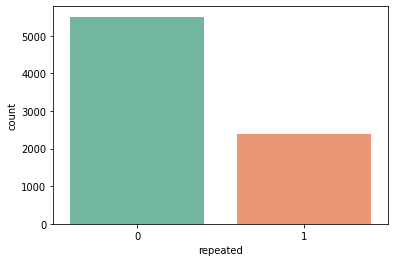

In [35]:
sns.countplot(x = 'repeated', data = data)
work_data['repeated'].value_counts()/7900

1. varijabla = SCHOOL

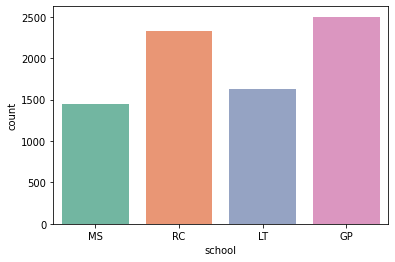

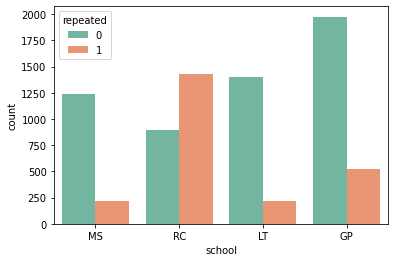

In [36]:
sns.countplot(x = 'school', data = data)
plt.show()
data['school'].value_counts()
sns.countplot(x = 'school', hue = 'repeated',data = data)
plt.show()

In [31]:
obs = pd.crosstab(data['school'],data['repeated'])
print(obs)
g, p, dof, expctd = chi2_contingency(obs,lambda_="log-likelihood")
print(p)

repeated     0     1
school              
GP        1975   527
LT        1403   222
MS        1234   214
RC         896  1429
0.0


$\chi^2$ test pokazuje ovisno varijable škola i ponavljanja godine. Možemo reći da ponavljanje godine ovisi o školi koju učenik pohađa. 

2.Varijabla = sex

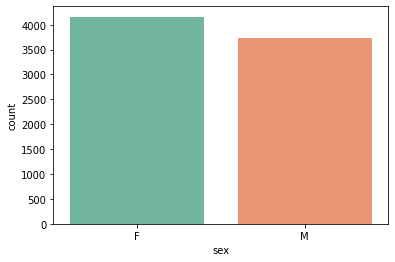

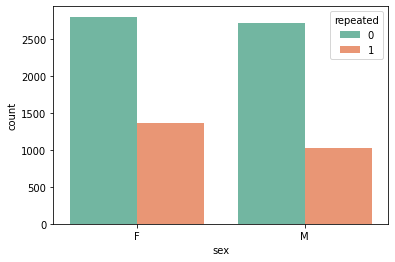

In [37]:
sns.countplot(x = 'sex', data = data)
plt.show()
data['sex'].value_counts()
sns.countplot(x = 'sex', hue = 'repeated',data = data)
plt.show()

In [53]:
obs = pd.crosstab(data['sex'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print(p)

repeated     1     0
sex                 
F         1361  2799
M         1031  2709
7.207292390507581e-07


In [54]:
a = 1361/2799
b = 1031/2709
oddrat = a/b
print(oddrat)

1.2776313696626445


In [50]:
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

OddsR:  1.2776313696626445 p-Value: 7.212931680765025e-07


3.varijabla = age

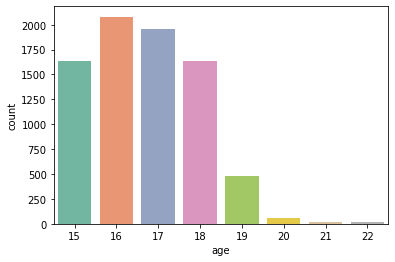

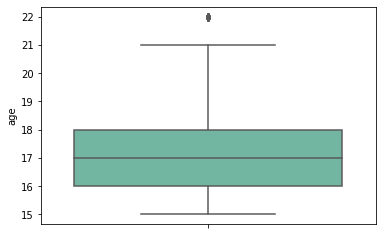

In [57]:
sns.countplot(x='age',data=data)
plt.show()
sns.boxplot(y='age',data=data)
plt.show()

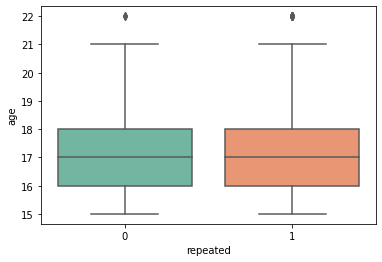

In [58]:
sns.boxplot(y='age',x = 'repeated',data=data)
plt.show()

In [67]:
r0 = data.age[data.repeated == 0]
r1 = data.age[data.repeated == 1]
s, p = stats.ttest_ind(r0,r1,equal_var = False)
print(p)

1.0255377075099464e-22


In [68]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'repeated', 'data_perimeter'],
      dtype='object')

4.varijabla = address

Urban    0.777215
Rural    0.222785
Name: address, dtype: float64


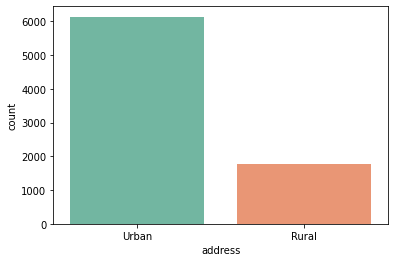

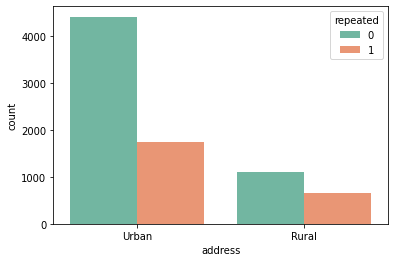

In [73]:
print(data['address'].value_counts()/7900)
sns.countplot(x = 'address', data = data)
plt.show()
sns.countplot(x = 'address', hue = 'repeated',data = data)
plt.show()

In [79]:
obs = pd.crosstab(data['address'],data['repeated'])
print(obs[[1,0]])
g, p, dof, expctd = chi2_contingency(obs[[1,0]],lambda_="log-likelihood")
print("chi2 test p-value: ",p)
oddsratio, pvalue = stats.fisher_exact(obs[[1,0]])
print("OddsR: ", oddsratio, "p-Value:", pvalue)

repeated     1     0
address             
Rural      655  1105
Urban     1737  4403
chi2 test p-value:  1.6413675145703275e-12
OddsR:  1.5025463885567512 p-Value: 1.491683833664934e-12


5.varijabla = famsize

>3     0.711392
<=3    0.288608
Name: famsize, dtype: float64


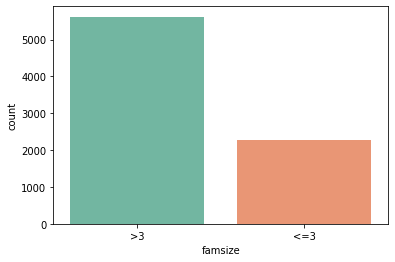

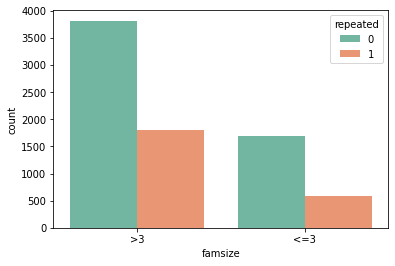

In [80]:
print(data['famsize'].value_counts()/7900)
sns.countplot(x = 'famsize', data = data)
plt.show()
sns.countplot(x = 'famsize', hue = 'repeated',data = data)
plt.show()